<H2> UMA ANÁLISE SOBRE A OCKTOBER FEST POR MEIO DOS ANOS </H2>

Para esta análise escolhi um dataset simples para verificar os hábitos e preferências das pessoas que frequentam a OcktoberFest em Munich entre os anos de 1985 e 2019.

In [184]:
# Bibliotecas necessárias.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [210]:
# Carga do dataset.

df = pd.read_csv('/home/luishenrique/Área de Trabalho/luis/analises/oktoberfest.csv')

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       35 non-null     int64  
 1   duration                   35 non-null     int64  
 2   guests_total               35 non-null     float64
 3   guests_daily               35 non-null     int64  
 4   beer_price                 35 non-null     float64
 5   beer_consumption           35 non-null     int64  
 6   roast_chicken_price        35 non-null     float64
 7   roast_chicken_consumption  35 non-null     int64  
dtypes: float64(3), int64(5)
memory usage: 2.3 KB


In [212]:
df.head()

,year,duration,guests_total,guests_daily,beer_price,beer_consumption,roast_chicken_price,roast_chicken_consumption
0,1985,16,7.1,444,3.20,54541,4.77,629520
1,1986,16,6.7,419,3.30,53807,3.92,698137
2,1987,16,6.5,406,3.37,51842,3.98,732859
3,1988,16,5.7,356,3.45,50951,4.19,720139
4,1989,16,6.2,388,3.60,51241,4.22,775674


In [213]:
# Entre os campos há guests_total que está em milhares e beer_consumption que está em hectolitros.
# Foram transformadas em totais e litros.

df['guests_total'] = df['guests_total'] * 1000000
df['beer_consumption'] = df['beer_consumption'] * 100

In [214]:
df.head()

,year,duration,guests_total,guests_daily,beer_price,beer_consumption,roast_chicken_price,roast_chicken_consumption
0,1985,16,7100000.0,444,3.20,5454100,4.77,629520
1,1986,16,6700000.0,419,3.30,5380700,3.92,698137
2,1987,16,6500000.0,406,3.37,5184200,3.98,732859
3,1988,16,5700000.0,356,3.45,5095100,4.19,720139
4,1989,16,6200000.0,388,3.60,5124100,4.22,775674


In [215]:
# Foi verificado o consumo de cerveja e de frango por pessoa por ano.

df['mean_beer_consumption'] = df['beer_consumption'] / df['guests_total'] 
df['mean_roast_chicken_consumption'] = df['roast_chicken_consumption'] / df['guests_total'] 

In [216]:
df.head()

,year,duration,guests_total,guests_daily,beer_price,beer_consumption,roast_chicken_price,roast_chicken_consumption,mean_beer_consumption,mean_roast_chicken_consumption
0,1985,16,7100000.0,444,3.20,5454100,4.77,629520,0.768183,0.088665
1,1986,16,6700000.0,419,3.30,5380700,3.92,698137,0.803090,0.104200
2,1987,16,6500000.0,406,3.37,5184200,3.98,732859,0.797569,0.112748
3,1988,16,5700000.0,356,3.45,5095100,4.19,720139,0.893877,0.126340
4,1989,16,6200000.0,388,3.60,5124100,4.22,775674,0.826468,0.125109


In [217]:
warnings.filterwarnings('ignore', category=FutureWarning)

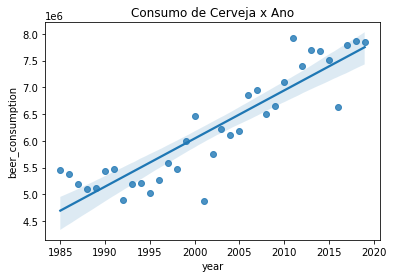

In [237]:
sns.regplot('year', 'beer_consumption', data=df);
plt.title('Consumo de Cerveja x Ano');

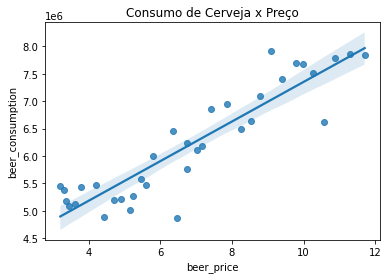

In [247]:
sns.regplot('beer_price', 'beer_consumption', data=df);
plt.title('Consumo de Cerveja x Preço');

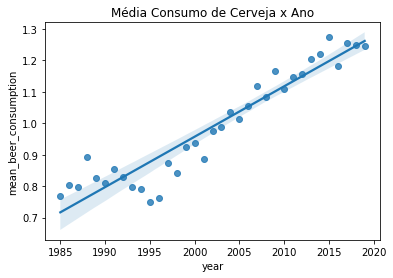

In [241]:
sns.regplot('year', 'mean_beer_consumption', data=df);
plt.title('Média Consumo de Cerveja x Ano');

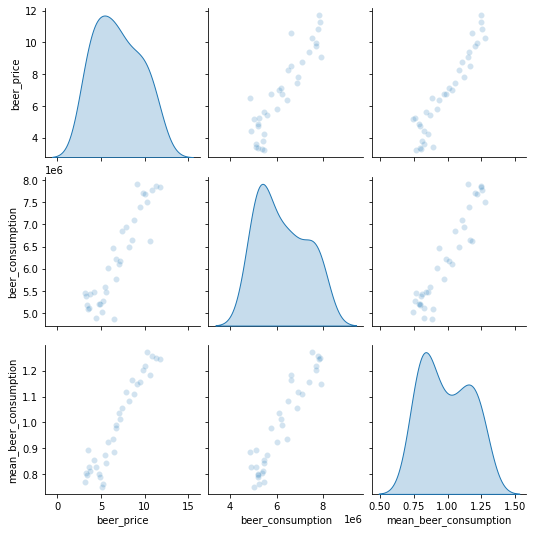

In [251]:
sns.pairplot(df[['beer_price', 'beer_consumption', 'mean_beer_consumption']],
             diag_kind='kde', plot_kws={'alpha': 0.2});

Comparações nos campos da cerveja:

1 - O Consumo total vem aumentando a cada ano;
2 - A Média de consumo vem aumentando a cada ano;
3 - O Preço da cerveja não vem freiando o aumento no consumo a cada ano.
4 - O consumo de cerveja tem aumentado a cada ano. Temos 2 pontos que ficaram abaixo da linha da média. O primeiro é referente ao ano de 2001, onde o consumo foi de 4869800 litros de cerveja, queda de 24,61% em relação ao ano anterior e com média de consumo de 0.885418 litros por pessoa. O motivo desta queda de consumo foi que no mesmo ano, houve uma feira agricola no mesmo local que acontece de 4 em 4 anos. No ano de 2016 não foi encontrado um motivo.

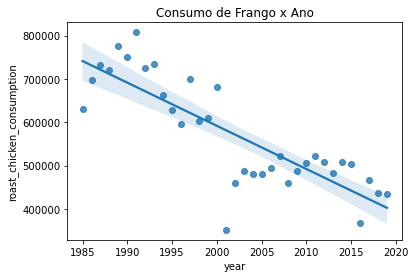

In [253]:
sns.regplot('year', 'roast_chicken_consumption', data=df);
plt.title('Consumo de Frango x Ano');

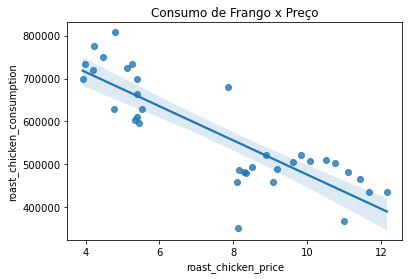

In [254]:
sns.regplot('roast_chicken_price', 'roast_chicken_consumption', data=df);
plt.title('Consumo de Frango x Preço');

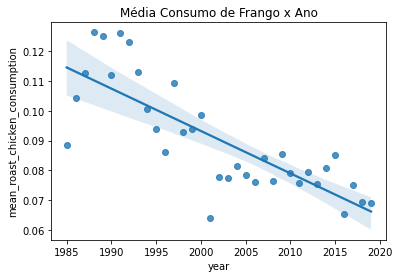

In [256]:
sns.regplot('year', 'mean_roast_chicken_consumption', data=df);
plt.title('Média Consumo de Frango x Ano');

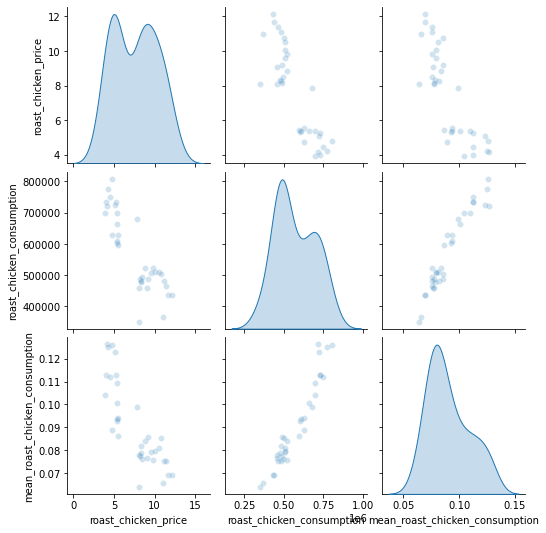

In [250]:
sns.pairplot(df[['roast_chicken_price', 'roast_chicken_consumption', 'mean_roast_chicken_consumption']],
             diag_kind='kde', plot_kws={'alpha': 0.2});

Comparações nos campos do frango:

1 - O Consumo total vem diminuindo a cada ano;
2 - A Média de consumo vem diminuindo a cada ano;
3 - Em 2000 houve um aumento de 45,91% no preço do frango;
4 - Em 2001 assim como aconteceu com o consumo de cerveja, houve uma queda de 41,50% no consumo de frango.

In [259]:
# Salvo para construção de um Dashboard.

df.to_csv('ocktober_final.csv', encoding='iso-8859-1', index=False)